In [2]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab

from core import colors

In [58]:
src = '../favicon.ico'
# src = 'latest.png'
fmt = 'RGBA'

15


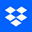

In [75]:
reduced = Image.open(src).convert("RGBA").quantize(256)
palette = reduced.getpalette(rawmode='RGBA') # get palette as [r,g,b,r,g,b,...]
palette = [palette[4*n:4*n+4] for n in range(256)]

color_count = [[n, np.array(palette[m][:3])] for n, m in reduced.getcolors() if palette[m][3] != 0]
# color_count = [[n, np.array(palette[m][:3])] for n, m in reduced.getcolors() ]
color_count = sorted(color_count, reverse=True, key=(lambda x: x[0]))
colors = color_count

# threshold = np.std([x[0] for x in colors[2:]]) * 0.05
threshold = 15
print(threshold)

colors = sorted(filter(lambda x: x[0] > threshold, colors), reverse=True, key=(lambda x: x[0]))
# print(colors)
# colors = color_count

dominant = []
threshold_distance = 35


for candidate in colors:
    check = []
    for selected in dominant:
        dist = np.linalg.norm(rgb2lab(candidate[1]/255)-rgb2lab(selected[1]/255))
        if dist < threshold_distance:
            # 'selected' subsumes 'candidate'
            selected[0] += candidate[0]
        check.append(dist < threshold_distance)
    if any(check):
        continue
    dominant.append(candidate)
    if len(dominant) == 10:
        break


# Keep taking next color with these conditions:
# - SKIP if distance from current to already selected is < threshold_distance
# - BREAK if count(cur) < threshold_count
#    - size * 0.1 maybe for 10% of the pixels

# Dominant will work OK if we only select elements that are > threshold_distance from previous element
reduced

[[759, array([  0,  97, 253])], [143, array([251, 250, 241])]]


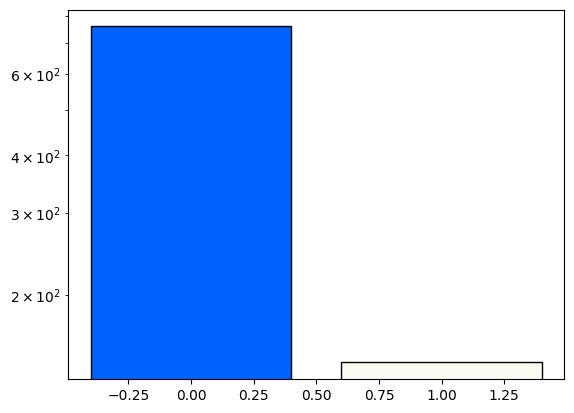

In [76]:
print(dominant)
p = plt.bar(range(0, len(dominant)), [x[0] for x in dominant], log=True, edgecolor='black', color=[tuple(np.array(x[1])/255) for x in dominant])


In [74]:
import requests
url='https://www.microsoft.com/favicon.ico?v2'
headers ={
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/114.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
}
response = requests.get(url, timeout=(2,2),headers=headers)
resp.content

b'<html><head><title>Microsoft Corporation</title><meta http-equiv="X-UA-Compatible" content="IE=EmulateIE7"></meta><meta http-equiv="Content-Type" content="text/html; charset=utf-8"></meta><meta name="SearchTitle" content="Microsoft.com" scheme=""></meta><meta name="Description" content="Get product information, support, and news from Microsoft." scheme=""></meta><meta name="Title" content="Microsoft.com Home Page" scheme=""></meta><meta name="Keywords" content="Microsoft, product, support, help, training, Office, Windows, software, download, trial, preview, demo,  business, security, update, free, computer, PC, server, search, download, install, news" scheme=""></meta><meta name="SearchDescription" content="Microsoft.com Homepage" scheme=""></meta></head><body><p>Your current User-Agent string appears to be from an automated process, if this is incorrect, please click this link:<a href="http://www.microsoft.com/en/us/default.aspx?redir=true">United States English Microsoft Homepage</